### Importing required libraries

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the dataset

In [124]:
data = pd.read_csv('loan.csv')

# Data Cleanup
1. dropping columns that mostly does not have data and is of not any use.
2. dropping columns that have same values(variance = 0)
3. Convert numerical columns like int_rate, emp_length to appropriate data types
4. clean up id fields

In [125]:
data = data.dropna(axis=1, how='all')

In [126]:
round(data.isnull().sum()/len(data.index) * 100)

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [127]:
data = data.drop(['mths_since_last_record','next_pymnt_d'], axis=1)

In [128]:
data.var()

id                            4.439202e+10
member_id                     7.058496e+10
loan_amnt                     5.560194e+07
funded_amnt                   5.165640e+07
funded_amnt_inv               5.081481e+07
installment                   4.362871e+04
annual_inc                    4.069645e+09
dti                           4.460361e+01
delinq_2yrs                   2.418786e-01
inq_last_6mths                1.145369e+00
mths_since_last_delinq        4.848830e+02
open_acc                      1.936249e+01
pub_rec                       5.626382e-02
revol_bal                     2.523338e+08
total_acc                     1.299990e+02
out_prncp                     1.407547e+05
out_prncp_inv                 1.397447e+05
total_pymnt                   8.175850e+07
total_pymnt_inv               7.997139e+07
total_rec_prncp               4.992160e+07
total_rec_int                 6.802248e+06
total_rec_late_fee            5.314380e+01
recoveries                    4.743694e+05
collection_

In [129]:
#Dropping columns haveing the same values throughout
data = data.drop(['pub_rec','collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1)

In [130]:
#removing id fields
data = data.drop(['id','member_id'], axis=1)

In [131]:
# convert column int_rate float
data['int_rate'] = data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [132]:
# convert column emp_length to numeric
# excluding missing values so that the conversion logic does not fail
data = data[~data['emp_length'].isnull()]

import re
data['emp_length'] = data['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
data['emp_length'] = data['emp_length'].apply(lambda x: pd.to_numeric(x))

In [133]:
# convert column term to numeric
# excluding missing values so that the conversion logic does not fail
data = data[~data['term'].isnull()]

import re
data['term'] = data['term'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
data['term'] = data['term'].apply(lambda x: pd.to_numeric(x))

# Data Analysis
Removing columns that contain customer behavioural data that will not be useful when considering the loan application
and keeping only fields that would help us to determine the if the customer is going to default or not

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38642 non-null  int64  
 1   funded_amnt              38642 non-null  int64  
 2   funded_amnt_inv          38642 non-null  float64
 3   term                     38642 non-null  int64  
 4   int_rate                 38642 non-null  float64
 5   installment              38642 non-null  float64
 6   grade                    38642 non-null  object 
 7   sub_grade                38642 non-null  object 
 8   emp_title                37202 non-null  object 
 9   emp_length               38642 non-null  int64  
 10  home_ownership           38642 non-null  object 
 11  annual_inc               38642 non-null  float64
 12  verification_status      38642 non-null  object 
 13  issue_d                  38642 non-null  object 
 14  loan_status           

In [135]:
data.loan_status = data.loan_status.astype('category')
data.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [136]:
#loans having status 'Current' does not help in determinig if the customer might default or not so we can get rid of entries having loan_status = current
data = data[data['loan_status'] != 'Current']

# Univariate Analysis

In [137]:
# lets get counts of fully paid vs charged off loans
data.loan_status = data.loan_status.apply(lambda x: 0 if x == 'Charged Off' else 1)
data.loan_status = data.loan_status.apply(lambda x : pd.to_numeric(x))
data['loan_status'].value_counts()

1    32145
0     5399
Name: loan_status, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

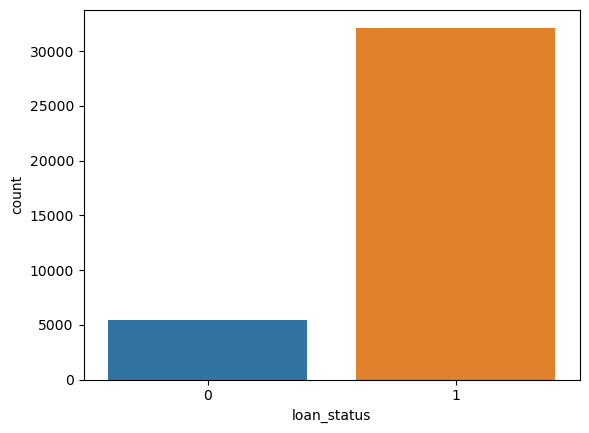

In [138]:
sns.countplot(x=data.loan_status)

we have a lot of loans with loan status as fully paid which makes sense as we most of the loans to be paid of to be able to successfully run a lending business

<Axes: xlabel='term', ylabel='count'>

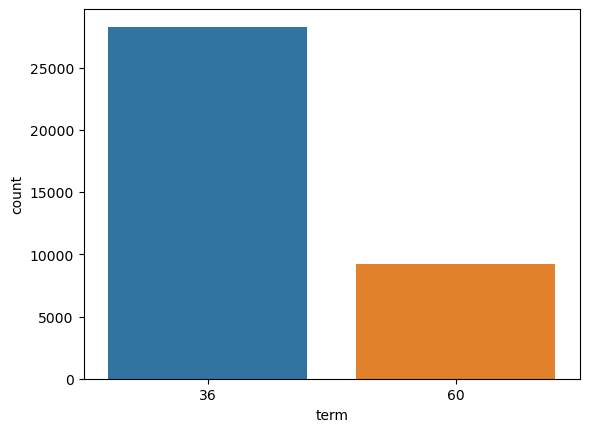

In [139]:
# lets get counts of terms to understand what is the most popular choice of term opted by customers
sns.countplot(x=data.term)

clearly most people go with a relatively shorter term 

<Axes: xlabel='loan_amnt', ylabel='Density'>

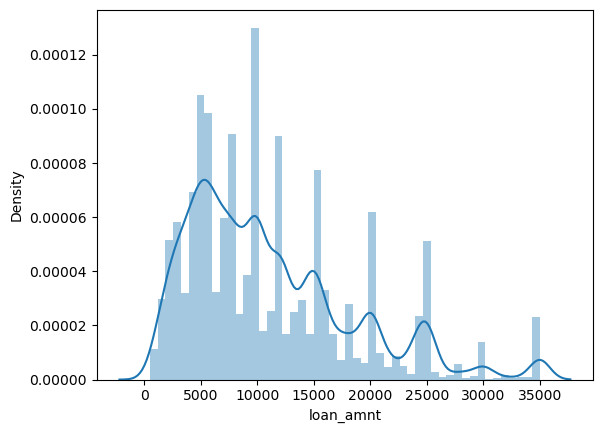

In [140]:
#lets see how loan amount is distributed
import warnings
warnings.filterwarnings('ignore') 
sns.distplot(data.loan_amnt)

<Axes: xlabel='loan_amnt'>

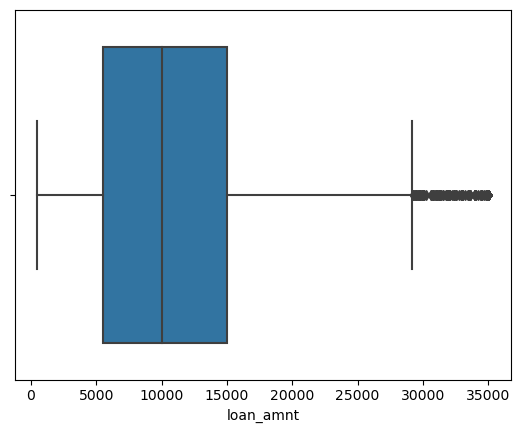

In [141]:
sns.boxplot(x=data.loan_amnt)

lot of loans are concentrated for lower amounts and there are fewer people going for bigger loan amounts

# Bivariate Analysis

<Axes: xlabel='loan_status', ylabel='int_rate'>

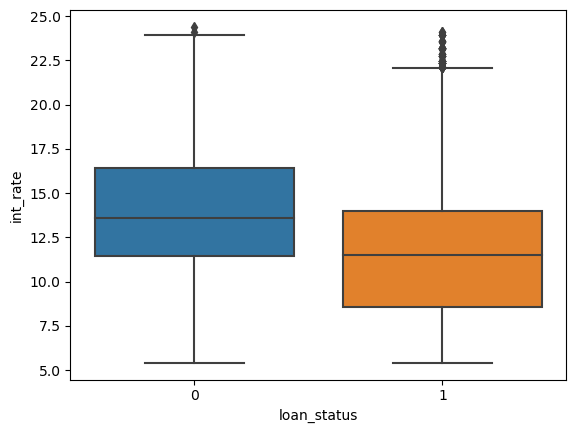

In [142]:
# lets see how loan_status varies int_rates
sns.boxplot(x=data.loan_status, y=data.int_rate)

you could see that higher the interest rates higher is the likeliness of the customer defaulting

<Axes: xlabel='term', ylabel='loan_status'>

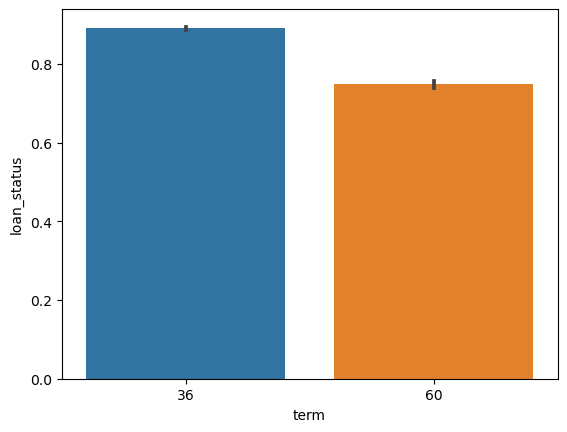

In [143]:
#lets now try to understand the how the loan_status varies with term
sns.barplot(y='loan_status', x='term', data=data)

we could see that the loans with higher term is likely to default that the ones with shorter term

In [144]:
data.dti.describe()

count    37544.000000
mean        13.284186
std          6.660551
min          0.000000
25%          8.160000
50%         13.380000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

In [145]:
# now lets see how dti affects loan status using derived matrix from dti
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

data['dti_range'] = data.dti.apply(lambda x: dti(x))

<Axes: xlabel='dti_range', ylabel='loan_status'>

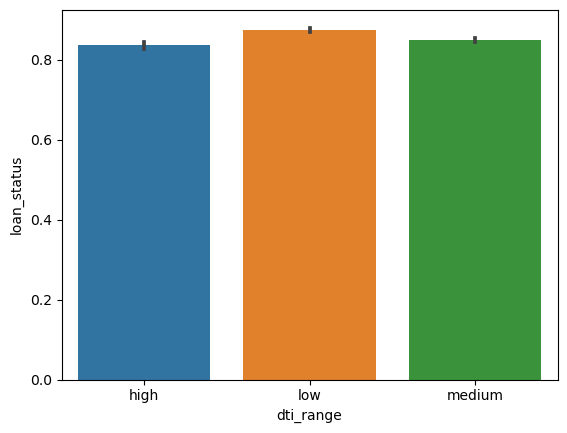

In [146]:
sns.barplot(y='loan_status', x='dti_range', data=data)

as you can see higher the debt to income ratio higher is the chance of the customer defaulting

In [147]:
# now lets determine the loan_status based on the derived metrix of how experienced the employee is
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

data['emp_length_enum'] = data[~data.emp_length.isnull()].emp_length.apply(lambda x: emp_length(x))

<Axes: xlabel='emp_length', ylabel='loan_status'>

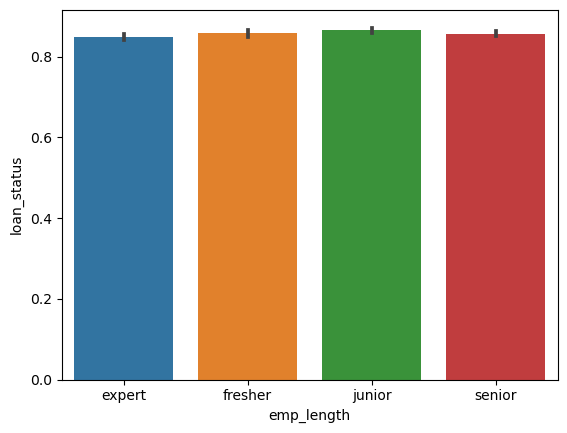

In [122]:
sns.barplot(y='loan_status', x='emp_length', data=data)

this clearly does not give a lot of information about who would default

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  int64  
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   sub_grade                37544 non-null  object 
 8   emp_title                36136 non-null  object 
 9   emp_length               37544 non-null  int64  
 10  home_ownership           37544 non-null  object 
 11  annual_inc               37544 non-null  float64
 12  verification_status      37544 non-null  object 
 13  issue_d                  37544 non-null  object 
 14  loan_status           

In [150]:
# now lets create a categorical variable w.r.t to int_rate and use that along with term to see how the combination of them would affect the loan satus
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
data['int_rate_category'] = data.int_rate.apply(lambda x: int_rate(x))

<Axes: xlabel='term', ylabel='loan_status'>

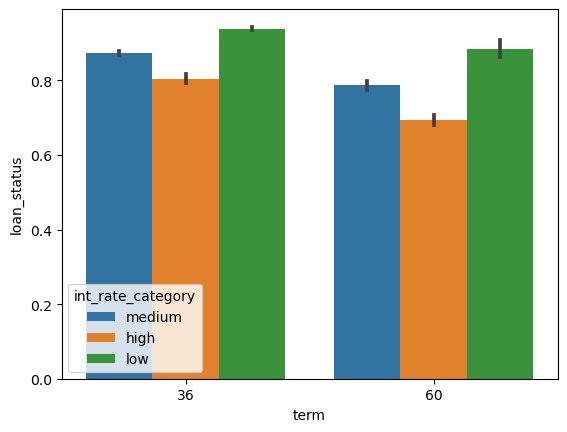

In [151]:
sns.barplot(y='loan_status', x='term', hue='int_rate_category', data=data)

clearly in both cases, higher the interest rate higher is the chance of the customer defaulting

In [154]:
data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

<Axes: xlabel='int_rate_category', ylabel='loan_status'>

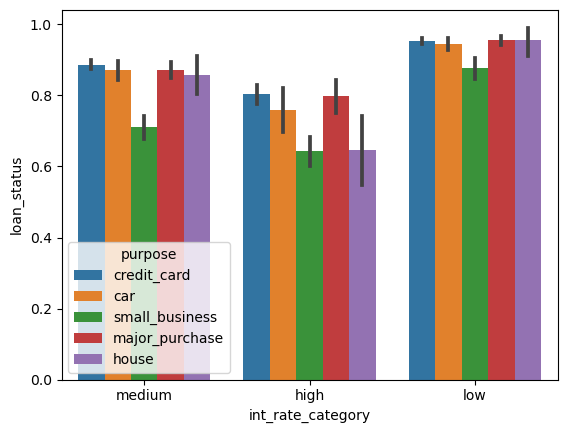

In [158]:
#now lets consider how the loan status varies with different purpose and int_rate_category, using only a few major purposes for simplicity
main_purpose = ['credit_card', 'car', 'small_business', 'major_purchase','house']
sns.barplot(y='loan_status', x='int_rate_category', hue='purpose', data=data[data.purpose.isin(main_purpose)])

small business loans seem to default more irrespective of the interest, however with higher interest rates even other categories have a relatively higher default rate.
we can also say that the default rate hardly varies across different purposes at lower interest rate than a high interest rate.

In [ ]:
#now lets consider how the loan status varies with different purpose and int_rate_category, using only a few major purposes for simplicity
main_purpose = ['credit_card', 'car', 'small_business', 'major_purchase','house']
sns.barplot(y='loan_status', x='int_rate_category', hue='purpose', data=data[data.purpose.isin(main_purpose)])